In [1]:
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# BASE_DIR = "/kaggle/input/violence-dataset/kaggle/working/violence_dataset"
BASE_DIR = "/kaggle/working/violence_dataset"
OUTPUT_DIR = "/kaggle/working/frames"
FRAME_INTERVAL = 2
TARGET_SIZE = (224, 224)

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
!pip install -q gdown

In [4]:
!gdown --folder "https://drive.google.com/drive/folders/1u3OP9bkDQx1AfMYcjsnw3HV0qRBuJG3c?usp=sharing" -O /kaggle/working/violence_dataset/Falling

Retrieving folder contents
Processing file 12eyfmwUu9y3KmPhvBPUZObBVYV0FU1Ag 20240915185618.mp4
Processing file 1UKFwCCTsh6czviN9Al2TxsGuUMYGDeMd 20240917121517.mp4
Processing file 1vDlBTre6buBWg5tLh3rP3XBBVJpAtsKf 20240917153156.mp4
Processing file 12NMfG2txgceF_y3EAToEZcXK7hx2SaWb 20240919201508.mp4
Processing file 1YoF3KdzdTs7oRPrUeHQkrOdoRe1zJb6V 20240919202855.mp4
Processing file 18D23rhps8LBqxQEry_9amh8zuf5hAtOD C_D_0069.mp4
Processing file 1AGLuLF_glcdNK1dikkU7vL-oBcmnCgdC C_D_0134_resized.mp4
Processing file 1o4xVWxboCIvESA9Fu0j9DyiTpCSfCclq C_D_0208.mp4
Processing file 1NuudeqZazB_DZas4qOJRBxr0T1Mq0tnl C_D_0265_resized.mp4
Processing file 1ZdkkP-_9l9wxKRd8e02kEpjU7wGUNdfJ C_M_35_resized.mp4
Processing file 1mPwSC4Ql9jpjID-PW8e0uesusE5phAVG C_M_117_resized.mp4
Processing file 1Qnrz5G7CSPxu-uLyk3R3W-U7RRPAe7_F C_N_194_resized.mp4
Processing file 1qUbCVag9d3qQBbpV8mqrwQaORjCW_6F4 C_N_298_resized.mp4
Processing file 1IPY6K6v7lMOLMbRT-qUuOF-TQ0XOBYgm C_N_431_anonymized_resized.mp4


In [5]:
!gdown --folder "https://drive.google.com/drive/folders/1C7PsGlYe8FgpWazAtTd1mwPENmNyzNvI?usp=sharing" -O /kaggle/working/violence_dataset/Punching

Retrieving folder contents
Processing file 1ZnYjxlAqWLTFP6zKQcnxx8QG1UUjC1Sl newfi10.avi
Processing file 1EiLqoitY2nYsggRAFKJ00E2KimoTk0X4 newfi14.avi
Processing file 1XxiF3A7M970NJfa1Cas5VtCSDaFncpWl video_20251229_163320_edit.mp4
Processing file 1xunUCczM20ngcFTe-GT21R07i5-dp5gI video_20251229_171909_edit.mp4
Processing file 1iSyJHkzcVcWLWr0Ou6VCX4kuH06bkWwF video_20251229_175853_edit.mp4
Processing file 17W1euKWwX5mQ8bAoTV0s1MQ2KvS3PFFd video_20251229_192333_edit.mp4
Processing file 1L9BC2Jq0qpl5UGNd1-bSWmEUirOQUh4Z video_20251229_194243_edit.mp4
Processing file 1KuwQDP6v2daLkRM1sBIO0La1XhmAjWSG video_20251229_195820_edit.mp4
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1ZnYjxlAqWLTFP6zKQcnxx8QG1UUjC1Sl
To: /kaggle/working/violence_dataset/Punching/newfi10.avi
100%|██████████████████████████████████████| 6.52M/6.52M [00:00<00:00, 24.2MB/s]
Downloading...
From: https://driv

In [6]:
!gdown --folder "https://drive.google.com/drive/folders/1DAjIBI-T3lx0LajQ0UjmiZLEZZuzTXAF?usp=sharing" -O /kaggle/working/violence_dataset/Holding_weapon

Retrieving folder contents
Processing file 1p-18-2cfW5uc5m7_ACOIVWODfcBymKSV video1.mp4
Processing file 1v_P5M3BGHdA5Ypat4aKlDKgtcoxSm_Wo video2.mp4
Processing file 1d5_GqsHR3lDwUvbsSesjGyuMHIkDVuMl video3.mp4
Processing file 16l2XTTY_ngTC2ryX3qho1Frd8O_hT40U video4.mp4
Processing file 16ctsD-pDtLrjscel2hSYaZtFaXX6-xdn video5.mp4
Processing file 1ppd8KoSA9pYp25jL1gBnBmOaoFFmWz1C video6.mp4
Processing file 1Abk4eYjqvRnnH7xGjz1uRl45p_aCYL6O video7.mp4
Processing file 11wWqan8_bhJi-cUmRosEzZq6CWt6uUjD video8.mp4
Processing file 1AFqfqqwKLFN0xB-onTgP93Bk52t6vgBs video9.mp4
Processing file 1M9tP5tvK2JwV04gxGMH6fCq8whinkvrZ video10.mp4
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1p-18-2cfW5uc5m7_ACOIVWODfcBymKSV
To: /kaggle/working/violence_dataset/Holding_weapon/video1.mp4
100%|██████████████████████████████████████| 17.0M/17.0M [00:00<00:00, 54.8MB/s]
Downloading...
From: https:

In [7]:
!gdown --folder "https://drive.google.com/drive/folders/1qGRQifD-IrV6gs2X3E-vttpqhHw4sYkI?usp=sharing" -O /kaggle/working/violence_dataset/Running

Retrieving folder contents
Processing file 1OnIGO7OjQc4OENlYM9Opk3oF53ygpQcd Copy of 2670-5_70111.avi
Processing file 1NAw6l0uoynwTCAJSQfrNRwxHZFTMLuSF Copy of 3687-17_70245.avi
Processing file 1WWDG48YK4PSbLzqcGBZOVD5OLYsO050g Copy of 5020-1_70062.avi
Processing file 11Ft3wmiOJy4x07bbHzMEVEooYH3cRG_3 Copy of 5117-8_70157.avi
Processing file 1t8vNWOljkQS1yMpQzt-9A0mYRV1o_MIy Copy of 5238-17_700000.avi
Processing file 1ghR1sLa_Gn4CmFReZEv9jyZ5e2PcDJBO Copy of 5238-17_700641.avi
Processing file 1KvmpA5pyJUPxk0rSkWx46OcANs8xCMf1 Copy of 5238-17_700950.avi
Processing file 1QwxEBRtaiyxtr0cJozXMPG2PaHq19tYq Copy of 5238-17_701141.avi
Processing file 1HzcDgFe_SxZ47z31d3Vk43Rr6jsHECvN Copy of 5238-17_701581.avi
Processing file 1ViZnz71K61WNg9qh0JBDPxGSyngYyN0C Copy of 5373-10_70026.avi
Processing file 1qGFF5lBt4d88Dpz60hKM23gN1OFVYXTp Copy of 6065-8_70110.avi
Processing file 1MzEqkCeSqPZRKvpVWwU7OvzT620D-7uQ Copy of 7603-3_70195.avi
Processing file 10bZ2HdNmJ5Ewl9UmoDKllYednOyBvmNH Copy of 785

In [8]:
!gdown --folder "https://drive.google.com/drive/folders/1WXh1U3Qmwl4vJiN61176yA7EB8jCM1pu?usp=drive_link" -O /kaggle/working/violence_dataset/Kicking

Retrieving folder contents
Processing file 1_WStA7tnBgrrD5b8Dy3F65yOdjDD0i0O ssstik.io_@nat_hearn_1766474161469_1.mp4
Processing file 13E2SoeDASh7oLd53Octuhk-koUah61vj ssstik.io_@nat_hearn_1766474161469_2.mp4
Processing file 1RbkbP8ECf_cnB56lH_DzeGnWL4g3XmD4 ssstik.io_@nat_hearn_1766474161469_3.mp4
Processing file 14M1FzJcY5ax8xJDGXSvEnGibGnrnbs2m ssstik.io_@nat_hearn_1766474199465.mp4
Processing file 1zMRJfI3k23q4ZixeVDRAZD_Wr2NwRui6 VID_20251222_213126_512_1.mp4
Processing file 1_1M8eUdG93VRom4lIfj72aMGArB0KjpX VID_20251222_213126_512_2.mp4
Processing file 19OPXq0IJoyP31PUHGZSi9MmpesRqCTPe VID_20251222_213126_512_3.mp4
Processing file 1GIZh4FILMaOCqSoKJEazp0XaK4ET4RDH VID_20251222_213126_512_4 (1)_1.mp4
Processing file 1LHW1JfDlClfhW_VL6BTnyMHhCdYoeJ3E VID_20251222_213126_512_4 (1).mp4
Processing file 1BMA_-q5PKEl_ybHggt4lI0DFPF4rRzrq VID_20251222_213126_512_5.mp4
Processing file 1evi-kuj-DbseCX4tjiWr_LbZMqy6qHH5 VID_20251222_213126_512_6.mp4
Processing file 10TN35aiFHCy248ff2el8y9yV

In [9]:
for c in os.listdir(BASE_DIR):
    print(c, "->", len(os.listdir(os.path.join(BASE_DIR, c))))

Holding_weapon -> 10
Punching -> 8
Falling -> 25
Kicking -> 7
Running -> 15


In [10]:
video_list = []

for label in os.listdir(BASE_DIR):
    label_path = os.path.join(BASE_DIR, label)
    if os.path.isdir(label_path):
        for f in os.listdir(label_path):
            if f.lower().endswith((".mp4", ".avi", ".mov")):
                video_list.append((label, os.path.join(label_path, f)))

print("Total video:", len(video_list))


Total video: 65


In [11]:
for label, video_path in tqdm(video_list, desc="Processing"):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        continue
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval_count = int(fps * FRAME_INTERVAL)
    
    frame_idx = 0
    saved_idx = 0

    label_out_dir = os.path.join(OUTPUT_DIR, label)
    os.makedirs(label_out_dir, exist_ok=True)

    video_name = os.path.splitext(os.path.basename(video_path))[0]
    video_out_dir = os.path.join(label_out_dir, video_name)
    os.makedirs(video_out_dir, exist_ok=True)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_idx % frame_interval_count == 0:
            resized = cv2.resize(frame, TARGET_SIZE)
            save_path = os.path.join(video_out_dir, f"frame_{saved_idx}.jpg")
            cv2.imwrite(save_path, resized)
            saved_idx += 1
        
        frame_idx += 1
    
    cap.release()

print("Selesai")

Processing: 100%|██████████| 65/65 [00:56<00:00,  1.15it/s]

Selesai


In [12]:
# #hapus punch karna masih belum bener
# import shutil

# path = "/kaggle/working/frames/Punching"

# if os.path.exists(path):
#     shutil.rmtree(path)
#     print("Folder Punching berhasil dihapus")
# else:
#     print("Folder tidak ditemukan")


**MODEL**

In [13]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import os
from tqdm import tqdm


2026-01-02 07:40:43.310367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767339643.487598      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767339643.534341      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [15]:
class_labels = {
    "Falling": "a person is falling down",
    "Holding_weapon": "a person is holding a weapon, such as a gun",
    "Punching": "a person is punching another person",
    "Running": "a motion-blurred shot of someone sprinting fast",
    "Kicking": "a person is kicking another person"
}

class_labels_specific = {
    "Falling": (
        "a person accidentally collapsing to the ground, "
        "body moving downward toward the floor, "
        "both legs failing to support body weight, "
        "not standing, not attacking, not kicking, not holding any object"
    ),
    "Holding_weapon": (
        "a person standing or moving while clearly holding a weapon such as a gun or knife, "
        "weapon visible in hand, "
        "not falling, not slipping, not collapsing"
    ),
    "Punching": (
        "a person throwing a punch toward another person, "
        "arm extended in a striking motion, "
        "feet planted or body stable"
    ),
    "Running": (
        "a person upright and balanced while running forward, "
        "alternating leg strides, "
        "not falling, not attacking"
    ),
    "Kicking": (
        "a person delivering a deliberate kick toward another person, "
        "one leg intentionally raised or extended, "
        "upper body stable and balanced, "
        "not falling or losing balance"
    )

}


text_prompts = list(class_labels.values())

In [16]:
FRAME_DIR = "/kaggle/working/frames"


In [17]:
def predict_frame(image_path):
    image = Image.open(image_path).convert("RGB")

    inputs = processor(
        text=text_prompts,
        images=image,
        return_tensors="pt",
        padding=True
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits_per_image
        probs = logits.softmax(dim=1)

    pred_idx = probs.argmax().item()
    pred_label = list(class_labels.keys())[pred_idx]
    pred_conf = probs[0, pred_idx].item()

    return pred_label, pred_conf


In [18]:
results = []

for label in os.listdir(FRAME_DIR):
    label_path = os.path.join(FRAME_DIR, label)
    if not os.path.isdir(label_path):
        continue
    
    for video in os.listdir(label_path):
        video_path = os.path.join(label_path, video)
        
        for frame in sorted(os.listdir(video_path)):
            frame_path = os.path.join(video_path, frame)

            pred_label, conf = predict_frame(frame_path)

            results.append({
                "true_label": label,
                "video": video,
                "frame": frame,
                "pred_label": pred_label,
                "confidence": conf
            })

len(results)


232

In [19]:
for r in results[:10]:
    print(r)

{'true_label': 'Holding_weapon', 'video': 'video6', 'frame': 'frame_0.jpg', 'pred_label': 'Holding_weapon', 'confidence': 0.8292880654335022}
{'true_label': 'Holding_weapon', 'video': 'video6', 'frame': 'frame_1.jpg', 'pred_label': 'Holding_weapon', 'confidence': 0.5181975960731506}
{'true_label': 'Holding_weapon', 'video': 'video6', 'frame': 'frame_2.jpg', 'pred_label': 'Holding_weapon', 'confidence': 0.7284420728683472}
{'true_label': 'Holding_weapon', 'video': 'video6', 'frame': 'frame_3.jpg', 'pred_label': 'Holding_weapon', 'confidence': 0.6515053510665894}
{'true_label': 'Holding_weapon', 'video': 'video6', 'frame': 'frame_4.jpg', 'pred_label': 'Holding_weapon', 'confidence': 0.7510538697242737}
{'true_label': 'Holding_weapon', 'video': 'video6', 'frame': 'frame_5.jpg', 'pred_label': 'Holding_weapon', 'confidence': 0.7753207087516785}
{'true_label': 'Holding_weapon', 'video': 'video4', 'frame': 'frame_0.jpg', 'pred_label': 'Holding_weapon', 'confidence': 0.8810511827468872}
{'true

In [20]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

true_labels = [r["true_label"] for r in results]
pred_labels = [r["pred_label"] for r in results]

accuracy = accuracy_score(true_labels, pred_labels)

precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, pred_labels, average="weighted", zero_division=0
)


print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

print("\n=== Classification Report ===\n")
print(classification_report(true_labels, pred_labels))


Accuracy : 0.7931034482758621
Precision: 0.7953322662918014
Recall   : 0.7931034482758621
F1 Score : 0.7918560221052147

=== Classification Report ===

                precision    recall  f1-score   support

       Falling       0.64      0.71      0.67        45
Holding_weapon       0.78      0.66      0.71        61
       Kicking       0.84      0.93      0.88        41
      Punching       0.81      0.88      0.85        25
       Running       0.88      0.87      0.87        60

      accuracy                           0.79       232
     macro avg       0.79      0.81      0.80       232
  weighted avg       0.80      0.79      0.79       232



In [21]:
# Confusion Matrix (numeric)
labels = list(class_labels.keys())

cm = confusion_matrix(true_labels, pred_labels, labels=labels)

print("=== Confusion Matrix ===")
print("Labels:", labels)
print(cm)

=== Confusion Matrix ===
Labels: ['Falling', 'Holding_weapon', 'Punching', 'Running', 'Kicking']
[[32 10  0  3  0]
 [11 40  3  3  4]
 [ 0  0 22  0  3]
 [ 7  1  0 52  0]
 [ 0  0  2  1 38]]


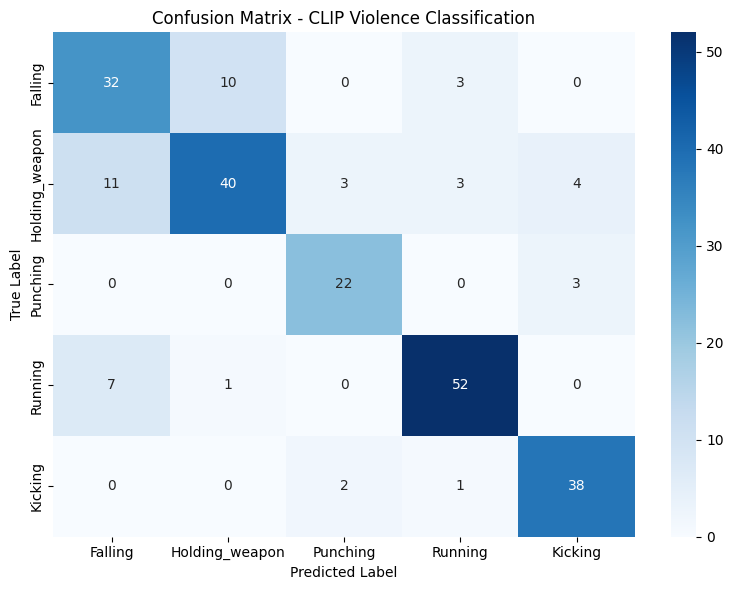

In [22]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CLIP Violence Classification")
plt.tight_layout()
plt.show()


In [23]:
import random
import cv2
import os
import matplotlib.pyplot as plt

def show_samples(results, n=12, shuffle=True):
    samples = results.copy()
    if shuffle:
        random.shuffle(samples)

    samples = samples[:n]

    cols = 4
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(cols * 4, rows * 4))

    for i, r in enumerate(samples):
        frame_path = os.path.join(
            FRAME_DIR,
            r["true_label"],
            r["video"],
            r["frame"]
        )

        img = cv2.imread(frame_path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")

        title = (
            f"True: {r['true_label']}\n"
            f"Pred: {r['pred_label']}\n"
            f"Conf: {r['confidence']:.2f}"
        )
        plt.title(title, fontsize=10)

    plt.tight_layout()
    plt.show()


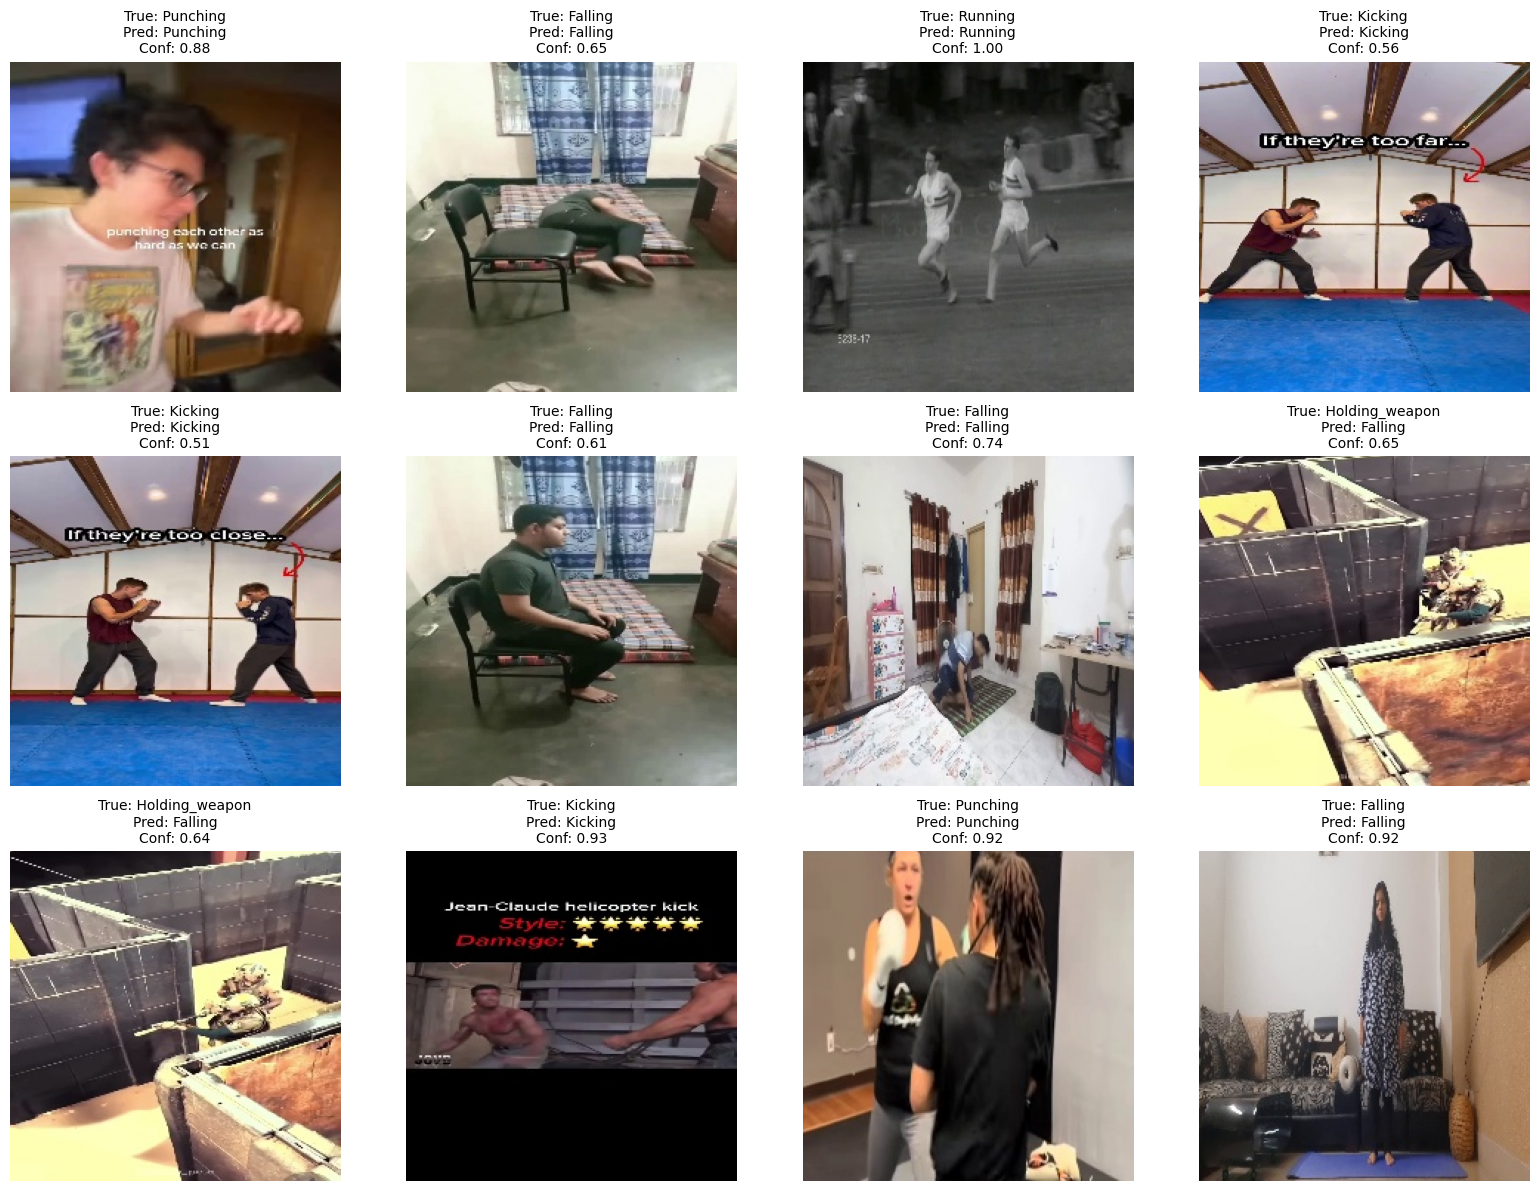

In [26]:
show_samples(results, n=12)
